Critial Resource: http://docs.astropy.org/en/stable/io/fits/index.html

In [1]:
import sys
import numpy as np
import numpy.ma as ma
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.nddata.utils import block_reduce
import os
import pandas as pd
import fnmatch


In [2]:
'''below, enter in the path to where python script named "SNARF_calibration"
is located'''


sys.path.append(r'C:\Users\MASSACHUSETTS\Documents\pH_study\Scripts') 
import SNARF_calibration as ws

In [3]:
'''change the last part of the path to where the 
specific standard measurements you want to use for calibration are located'''



std_path = r'C:\Users\MASSACHUSETTS\Documents\pH_study\standards\190410_stds' 

In [4]:
# Generate a list of all Flexible Image Transport System (FITS) files in directory.
FITfiles = []
for file in os.listdir("."):
    if file.endswith(".fits"):
        FITfiles.append(file)
print(len(FITfiles))
# Extract numerical data from those image files.
Aimages = [] #for 577 images
Bimages = [] # for 655 images
for i in range(len(FITfiles)):
    print(str(i).zfill(2) + " " + FITfiles[i])
    data = fits.open(FITfiles[i])
    if fnmatch.fnmatch(FITfiles[i], '*_577*'):
        Aimages.append(data[0].data)
    if fnmatch.fnmatch(FITfiles[i], "*_655*"):
        Bimages.append(data[0].data)
    #images.append(data[0].data)
print(np.shape(Aimages), np.shape(Bimages))


640
00 190409_092210_577_e1_0.fits
01 190409_092210_577_e2_0.fits
02 190409_092210_655_e1_0.fits
03 190409_092210_655_e2_0.fits
04 190409_092240_577_e1_1.fits
05 190409_092240_577_e2_1.fits
06 190409_092240_655_e1_1.fits
07 190409_092240_655_e2_1.fits
08 190409_092311_577_e1_2.fits
09 190409_092311_577_e2_2.fits
10 190409_092311_655_e1_2.fits
11 190409_092311_655_e2_2.fits
12 190409_092342_577_e1_3.fits
13 190409_092342_577_e2_3.fits
14 190409_092342_655_e1_3.fits
15 190409_092342_655_e2_3.fits
16 190409_092413_577_e1_4.fits
17 190409_092413_577_e2_4.fits
18 190409_092413_655_e1_4.fits
19 190409_092413_655_e2_4.fits
20 190409_092444_577_e1_5.fits
21 190409_092444_577_e2_5.fits
22 190409_092444_655_e1_5.fits
23 190409_092444_655_e2_5.fits
24 190409_092514_577_e1_6.fits
25 190409_092514_577_e2_6.fits
26 190409_092514_655_e1_6.fits
27 190409_092514_655_e2_6.fits
28 190409_092545_577_e1_7.fits
29 190409_092545_577_e2_7.fits
30 190409_092545_655_e1_7.fits
31 190409_092545_655_e2_7.fits
32 1

282 190409_095807_655_e1_70.fits
283 190409_095807_655_e2_70.fits
284 190409_095838_577_e1_71.fits
285 190409_095838_577_e2_71.fits
286 190409_095838_655_e1_71.fits
287 190409_095838_655_e2_71.fits
288 190409_095909_577_e1_72.fits
289 190409_095909_577_e2_72.fits
290 190409_095909_655_e1_72.fits
291 190409_095909_655_e2_72.fits
292 190409_095939_577_e1_73.fits
293 190409_095939_577_e2_73.fits
294 190409_095939_655_e1_73.fits
295 190409_095939_655_e2_73.fits
296 190409_100010_577_e1_74.fits
297 190409_100010_577_e2_74.fits
298 190409_100010_655_e1_74.fits
299 190409_100010_655_e2_74.fits
300 190409_100041_577_e1_75.fits
301 190409_100041_577_e2_75.fits
302 190409_100041_655_e1_75.fits
303 190409_100041_655_e2_75.fits
304 190409_100112_577_e1_76.fits
305 190409_100112_577_e2_76.fits
306 190409_100112_655_e1_76.fits
307 190409_100112_655_e2_76.fits
308 190409_100143_577_e1_77.fits
309 190409_100143_577_e2_77.fits
310 190409_100143_655_e1_77.fits
311 190409_100143_655_e2_77.fits
312 190409

558 190409_103334_655_e1_139.fits
559 190409_103334_655_e2_139.fits
560 190409_103404_577_e1_140.fits
561 190409_103404_577_e2_140.fits
562 190409_103404_655_e1_140.fits
563 190409_103404_655_e2_140.fits
564 190409_103435_577_e1_141.fits
565 190409_103435_577_e2_141.fits
566 190409_103435_655_e1_141.fits
567 190409_103435_655_e2_141.fits
568 190409_103506_577_e1_142.fits
569 190409_103506_577_e2_142.fits
570 190409_103506_655_e1_142.fits
571 190409_103506_655_e2_142.fits
572 190409_103537_577_e1_143.fits
573 190409_103537_577_e2_143.fits
574 190409_103537_655_e1_143.fits
575 190409_103537_655_e2_143.fits
576 190409_103608_577_e1_144.fits
577 190409_103608_577_e2_144.fits
578 190409_103608_655_e1_144.fits
579 190409_103608_655_e2_144.fits
580 190409_103638_577_e1_145.fits
581 190409_103638_577_e2_145.fits
582 190409_103638_655_e1_145.fits
583 190409_103638_655_e2_145.fits
584 190409_103709_577_e1_146.fits
585 190409_103709_577_e2_146.fits
586 190409_103709_655_e1_146.fits
587 190409_103

In [5]:
#add together exposures at same time points
added_A = []
added_B = []
for i in range(0,len(Aimages),2):
    new = Aimages[i] + Aimages[i+1]
    added_A.append(new)
for i in range(0, len(Bimages), 2):
    new = Bimages[i]+Bimages[i+1]
    added_B.append(new)
print(np.shape(added_A), np.shape(added_B))


(160, 960, 1280) (160, 960, 1280)


Critical Resources:
https://matplotlib.org/users/image_tutorial.html 
Visualizing Masked Arrays:
https://matplotlib.org/examples/pylab_examples/image_masked.html 

(240, 320)
(240, 320)


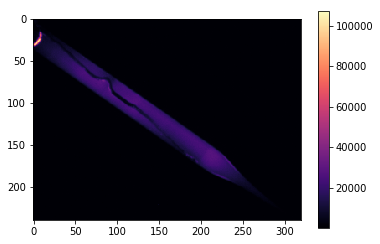

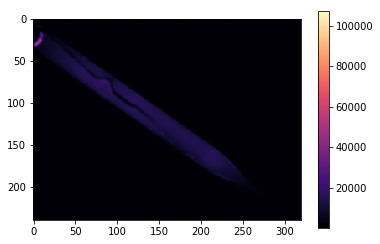

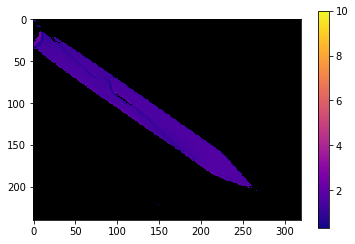

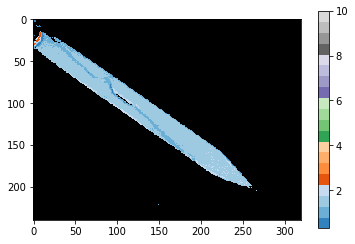

In [6]:
# A downsample value of 1 will use the original pixel density.
# A downsample value of 2 will bin 2x2 pixels from the original image into a single pixel.
downsample = 4
max_ratio = 10

# Import images and downsample
im1 = block_reduce(added_A[5],downsample)
print(im1.shape)
im2 = block_reduce(added_B[5],downsample)
print(im2.shape)
# Plot original images.
for im in [im2,im1]:
    imgplot = plt.imshow(im,
                         cmap="magma",
                         vmin=16,
                         vmax=max(im1.max(),im2.max()))
    plt.colorbar()
    for i in range(2):
        
        plt.savefig("{}".format(i)+".pdf", format = 'pdf')
    plt.show()

# Mask low-intensity pixels.
# This seems to be a reasonable threshold.
threshold = 16*4**downsample 
mim1 = ma.masked_less(im1,threshold)
mim2 = ma.masked_less(im2,threshold)

# Mask the superset of low-intensity pixels.
combined_mask = np.logical_or(ma.getmask(mim1),ma.getmask(mim2))
mim1[combined_mask] = ma.masked
mim2[combined_mask] = ma.masked

# Calculate ratio.
mim_ratio = mim2/mim1

# Plot the image of the ratios.
palette = copy.copy(plt.cm.plasma)
palette.set_over('w', 1.0)
palette.set_under('r', 1.0)
palette.set_bad('k', 1.0)
imgplot = plt.imshow(mim_ratio,
                     vmax=max_ratio,
                     cmap=palette)
plt.colorbar()
plt.show()

# Plot the data using a color map with discrete color transitions.
palette = copy.copy(plt.cm.tab20c)
palette.set_over('w', 1.0)
palette.set_under('r', 1.0)
palette.set_bad('k', 1.0)
imgplot = plt.imshow(mim_ratio,
                     vmax=max_ratio,
                     cmap=palette)
plt.colorbar()
plt.show()

0
ratio = 1.603182896811566


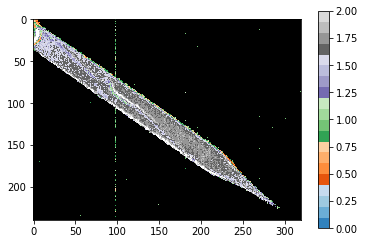

1
ratio = 1.5954041911208483


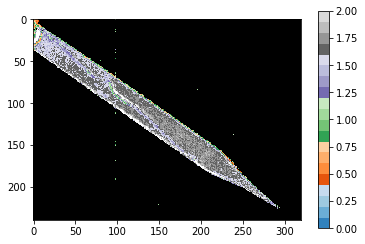

2
ratio = 1.564942611966806


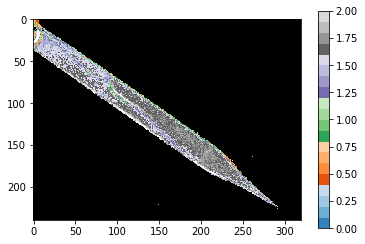

3
ratio = 1.531292004592245


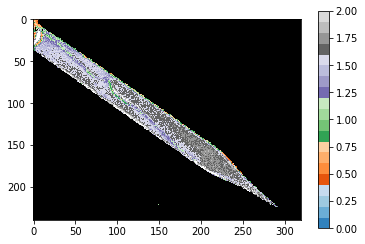

4
ratio = 1.4927214672759166


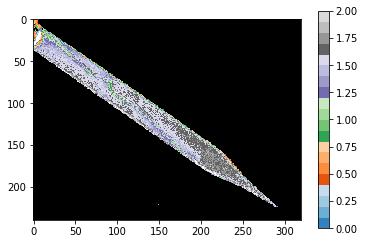

5
ratio = 1.4590174646532275


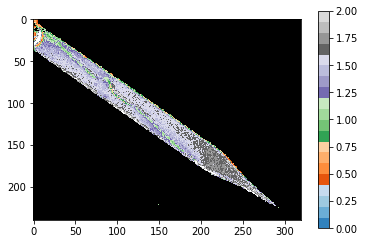

6
ratio = 1.4206537187669144


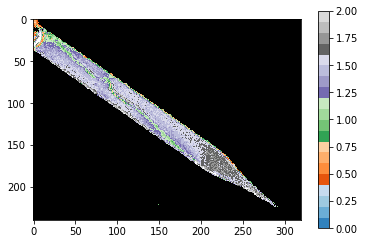

7
ratio = 1.3884907749353559


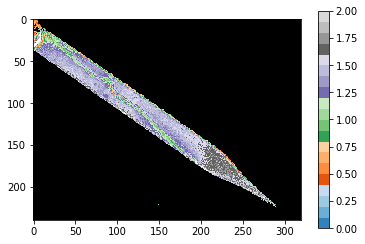

8
ratio = 1.3587139400210595


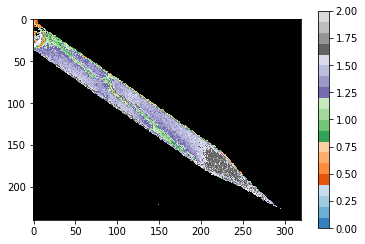

9
ratio = 1.3250799569423546


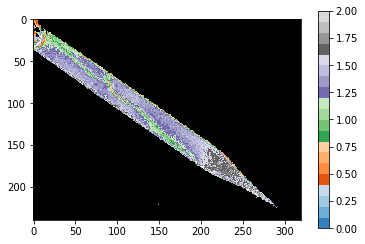

10
ratio = 1.2979640807864488


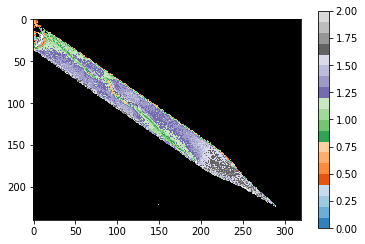

11
ratio = 1.2686058833539255


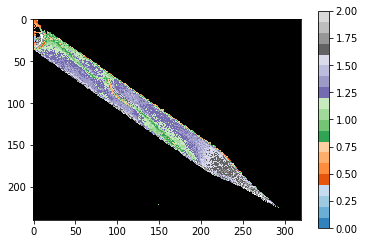

12
ratio = 1.2423029764048195


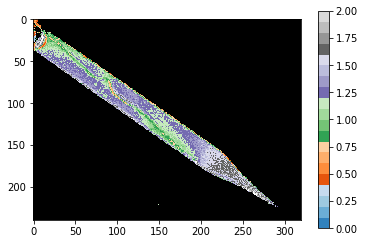

13
ratio = 1.2146383827091514


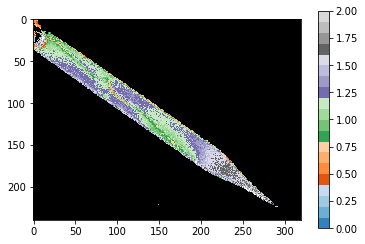

14
ratio = 1.1870892157137876


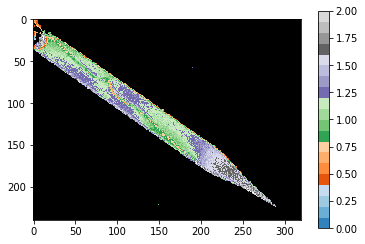

15
ratio = 1.1629766594412891


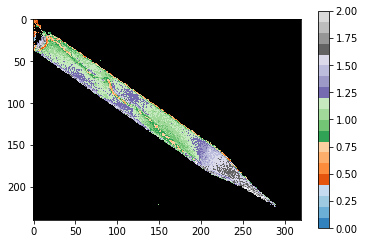

16
ratio = 1.1378539074764829


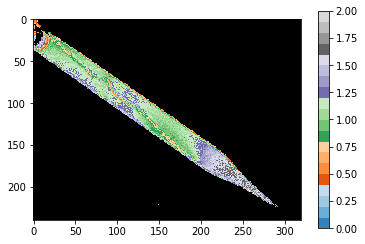

17
ratio = 1.1160690288751205


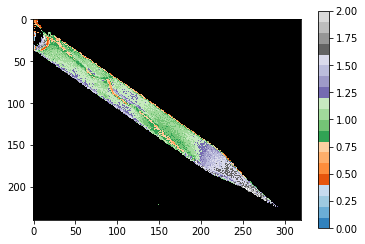

18
ratio = 1.0926990753178925


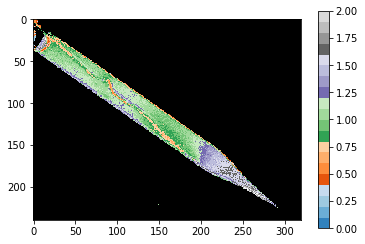

19
ratio = 1.071825838088962


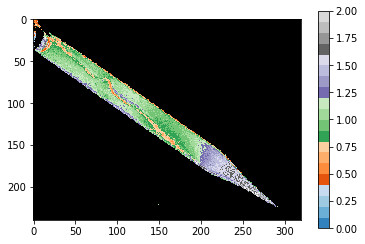

20
ratio = 1.0507538609833258


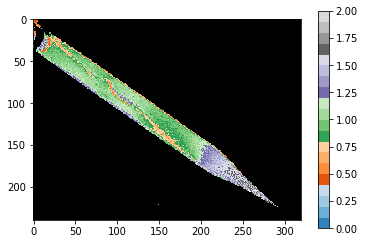

21
ratio = 1.029487317541346


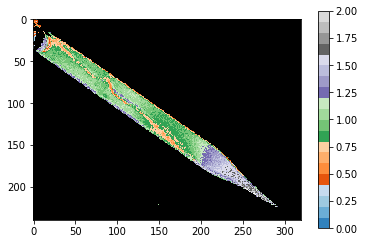

22
ratio = 1.0098768665805133


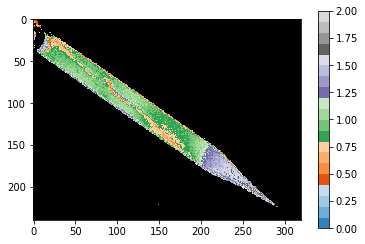

23
ratio = 0.9892761045001697


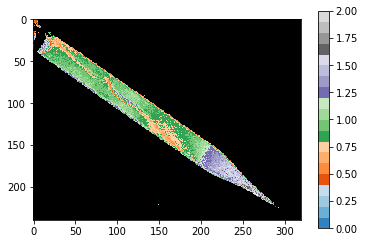

24
ratio = 0.9706802138304883


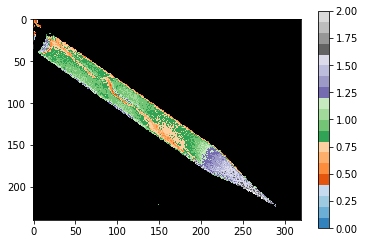

25
ratio = 0.9520467207906611


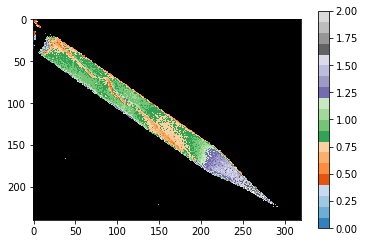

26
ratio = 0.9343103701648359


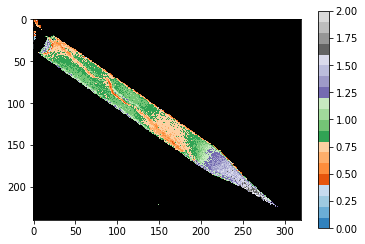

27
ratio = 0.9165431690468034


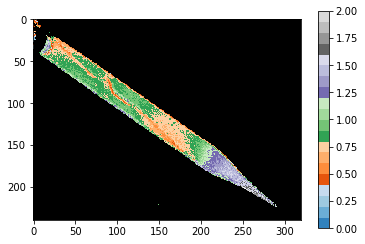

28
ratio = 0.9005640205155431


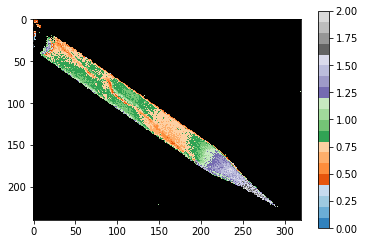

29
ratio = 0.8830468103951663


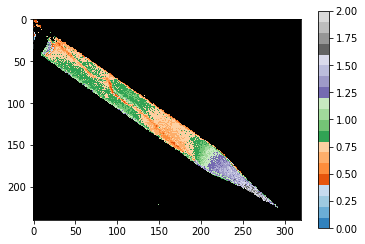

30
ratio = 0.8693960052936506


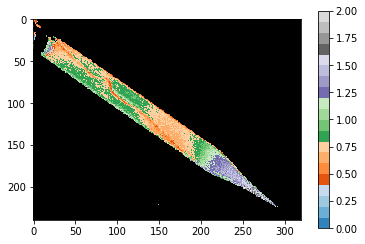

31
ratio = 0.8537553708883646


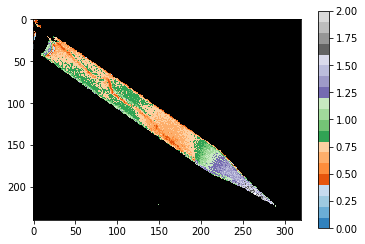

32
ratio = 0.838594380899052


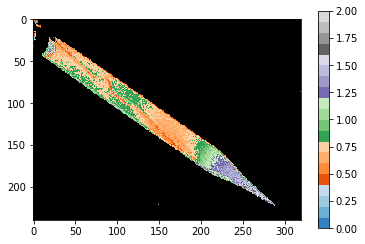

33
ratio = 0.8262252066503977


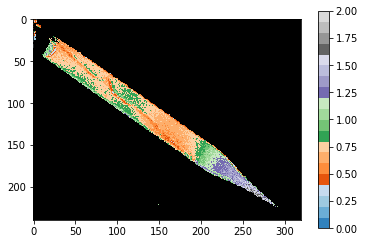

34
ratio = 0.8122674269282184


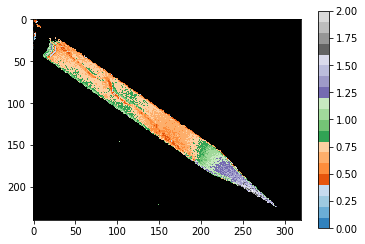

35
ratio = 0.7979633700008127


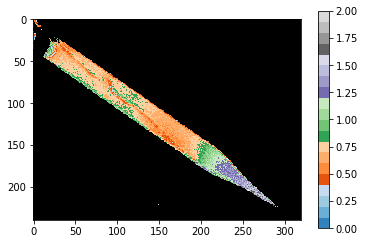

36
ratio = 0.7862405463300991


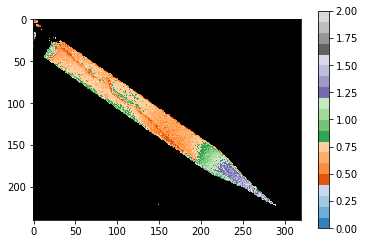

37
ratio = 0.7724474800189722


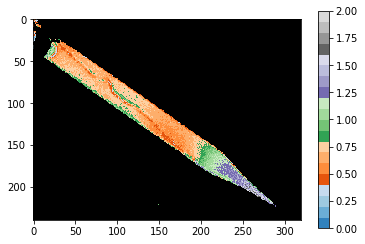

38
ratio = 0.7595680956942977


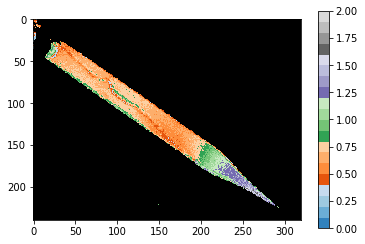

39
ratio = 0.7478295227294334


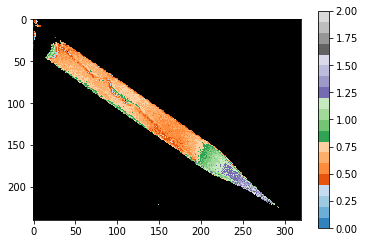

40
ratio = 0.7362523865333904


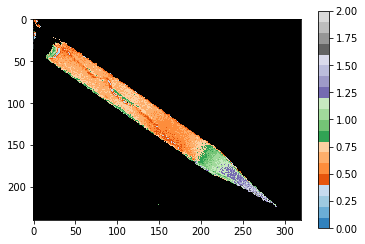

41
ratio = 0.7252152304580183


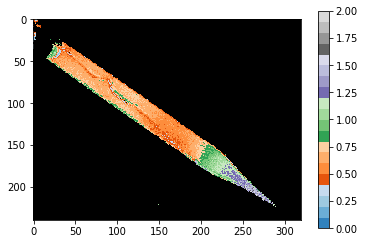

42
ratio = 0.7140800958741772


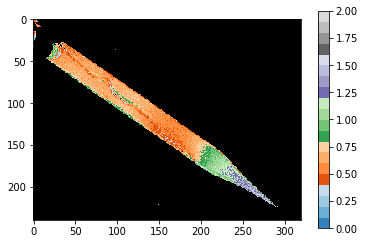

43
ratio = 0.7030751116110016


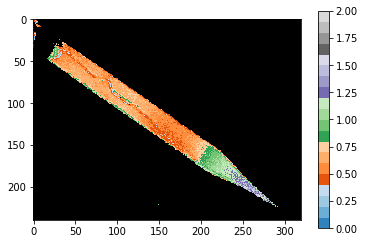

44
ratio = 0.6944977887646115


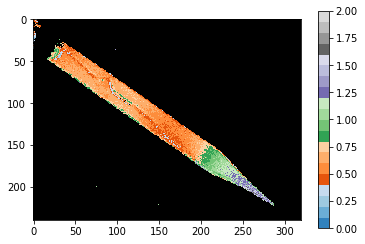

45
ratio = 0.6835443950710448


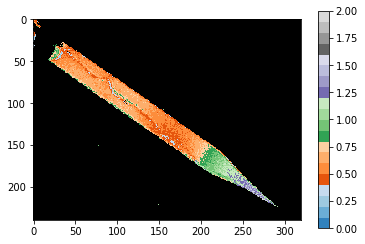

46
ratio = 0.6739531575551563


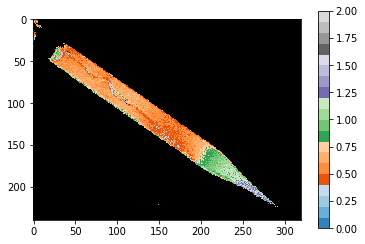

47
ratio = 0.6639296681989453


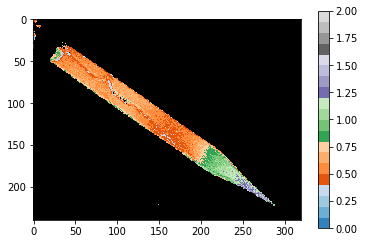

48
ratio = 0.6546188398122934


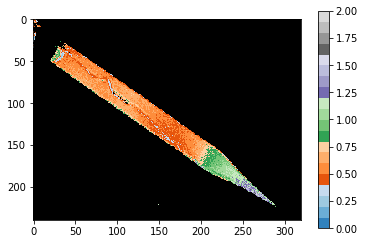

49
ratio = 0.6440989434374131


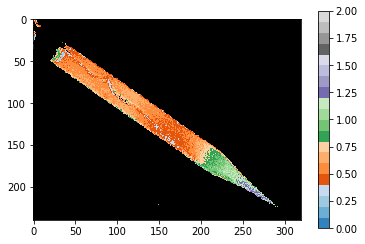

50
ratio = 0.6368483431378703


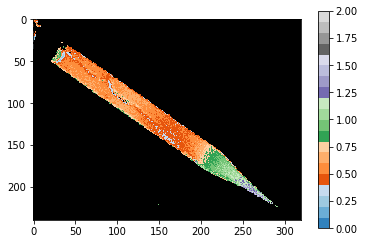

51
ratio = 0.6271611485286817


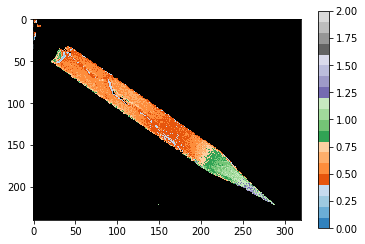

52
ratio = 0.6190358328593781


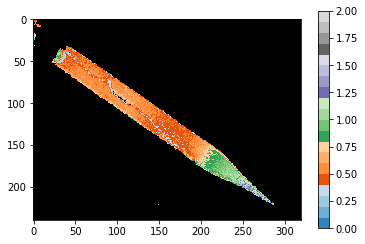

53
ratio = 0.6111869025949208


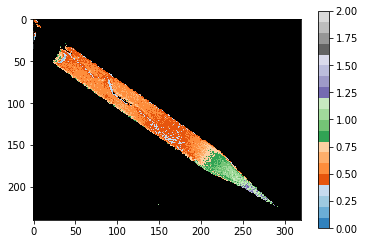

54
ratio = 0.6024233570332295


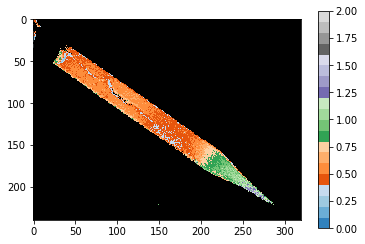

55
ratio = 0.5938538810567587


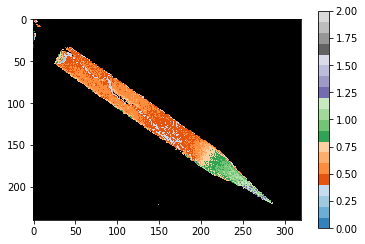

56
ratio = 0.5877646073497906


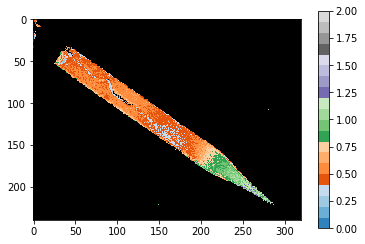

57
ratio = 0.5802530828025535


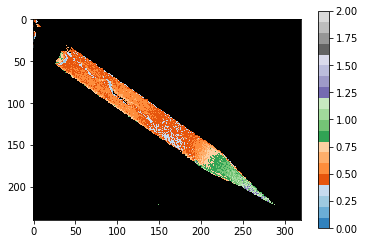

58
ratio = 0.5722355372419213


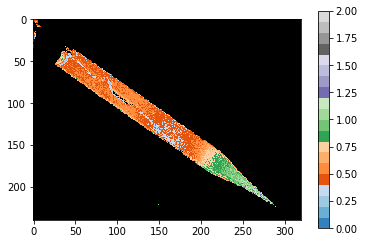

59
ratio = 0.564943745149084


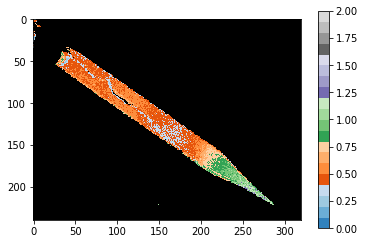

60
ratio = 0.5591392631268608


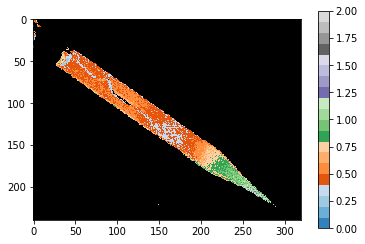

61
ratio = 0.5534163863703881


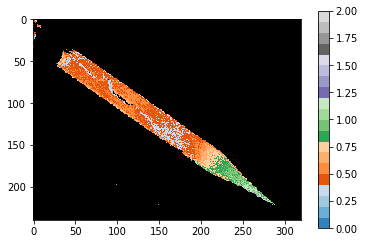

62
ratio = 0.54505987235647


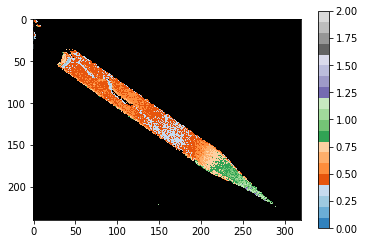

63
ratio = 0.5384733322939121


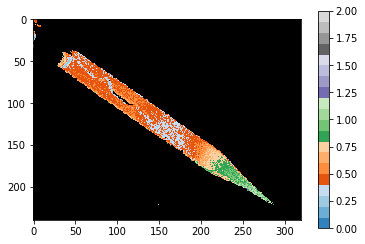

64
ratio = 0.5350511243868934


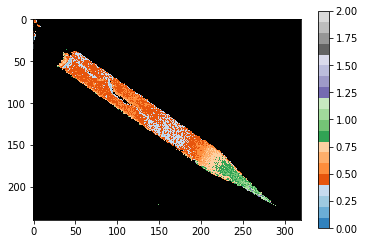

65
ratio = 0.5278007605108586


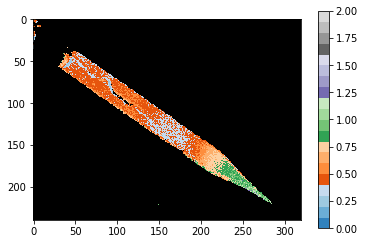

66
ratio = 0.5204423644032624


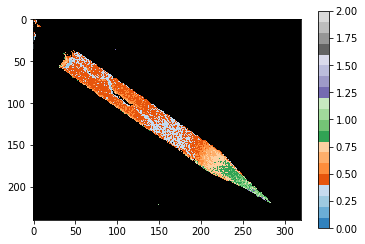

67
ratio = 0.5177363027463125


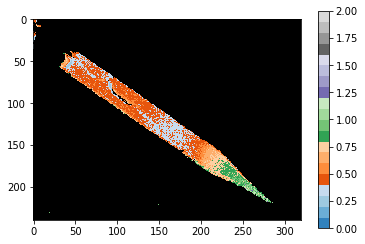

68
ratio = 0.5118337428569577


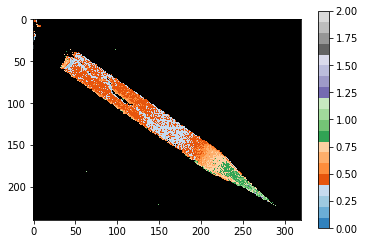

69
ratio = 0.5063926477076856


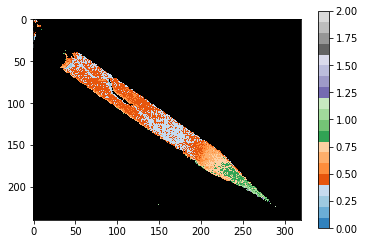

70
ratio = 0.5007928738332315


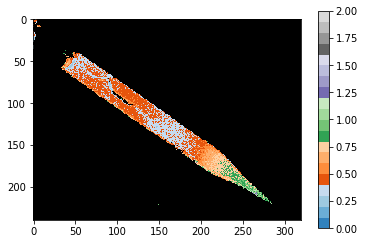

71
ratio = 0.49511452372113784


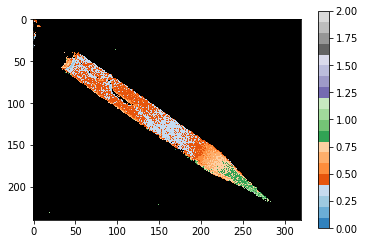

72
ratio = 0.49153020107525497


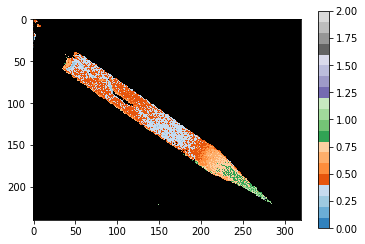

73
ratio = 0.48676818479504513


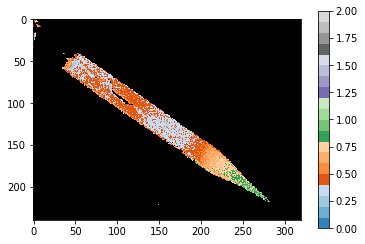

74
ratio = 0.48248603289050995


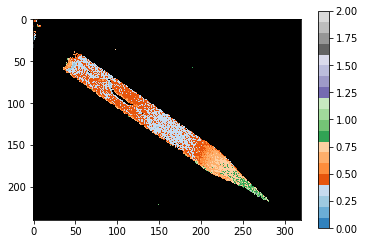

75
ratio = 0.47765861332776605


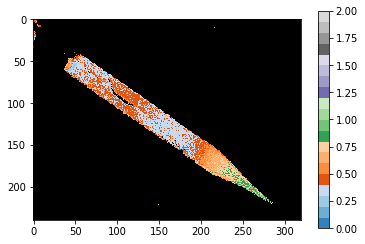

76
ratio = 0.47256597494478186


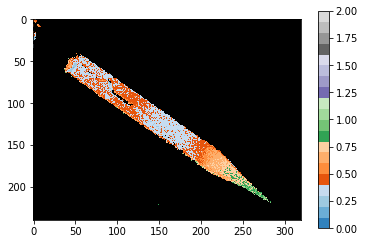

77
ratio = 0.46828760069523934


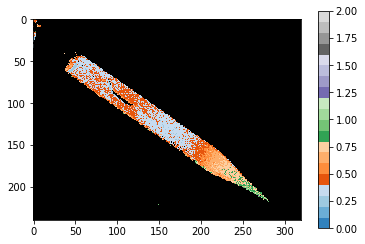

78
ratio = 0.4656200365087358


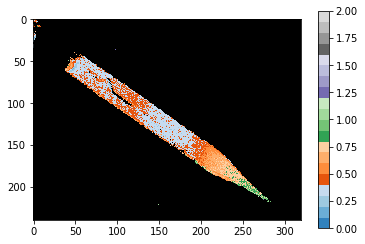

79
ratio = 0.46045973077454544


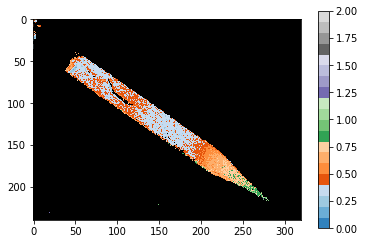

80
ratio = 0.4566168176483155


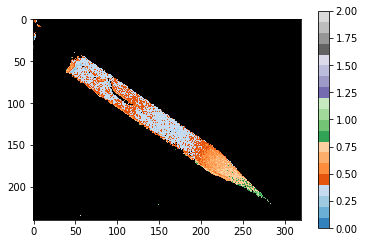

81
ratio = 0.45360255977911246


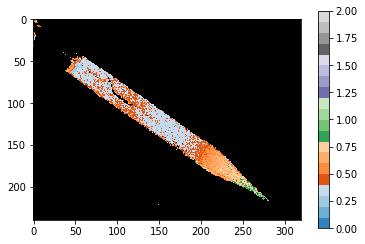

82
ratio = 0.4509959811363416


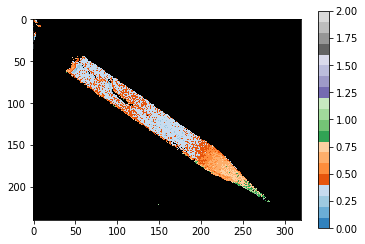

83
ratio = 0.4461010666564006


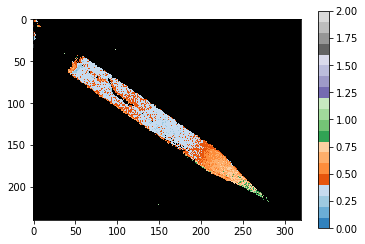

84
ratio = 0.44317849715105107


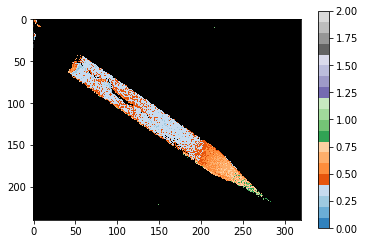

85
ratio = 0.4410431574255961


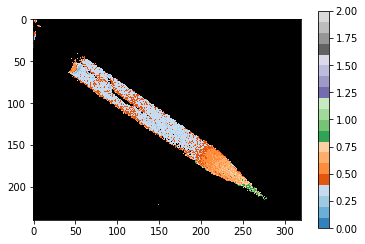

86
ratio = 0.43683594417090893


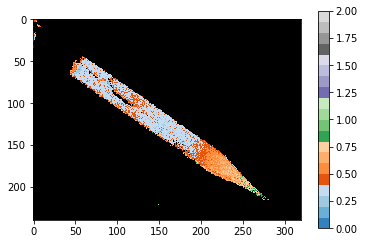

87
ratio = 0.43437556591194587


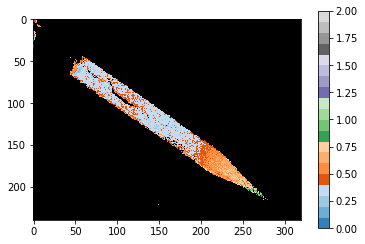

88
ratio = 0.43008281371073137


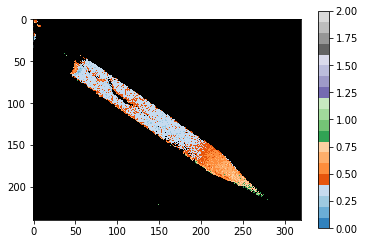

89
ratio = 0.4268054145637071


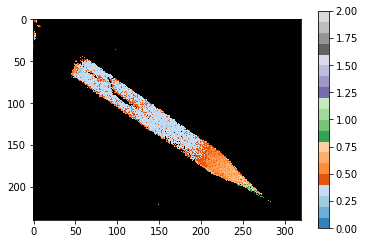

90
ratio = 0.42429703541454183


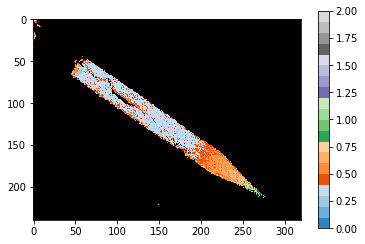

91
ratio = 0.42265817013614043


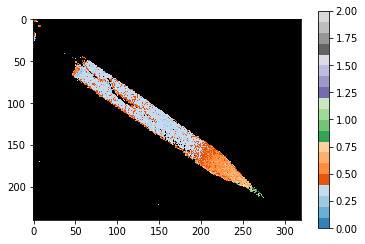

92
ratio = 0.4182029747325955


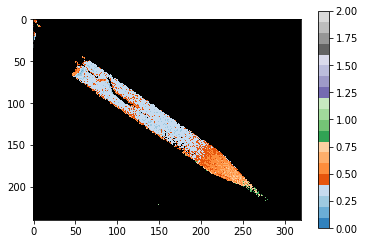

93
ratio = 0.41694659718157207


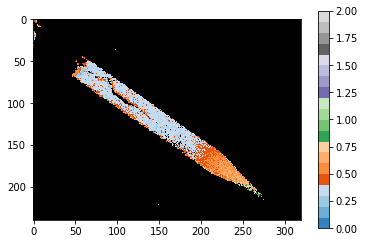

94
ratio = 0.4163508015119939


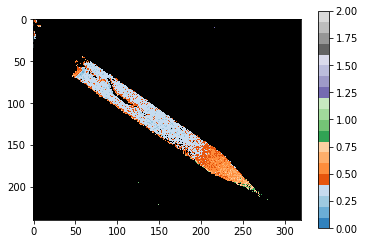

95
ratio = 0.41242103926632956


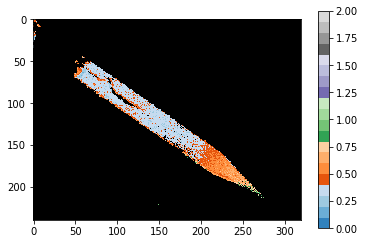

96
ratio = 0.4090179148672464


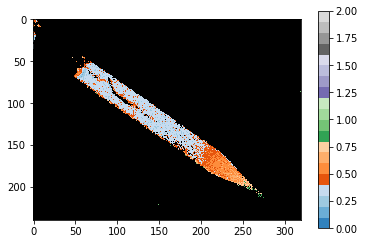

97
ratio = 0.408151162167474


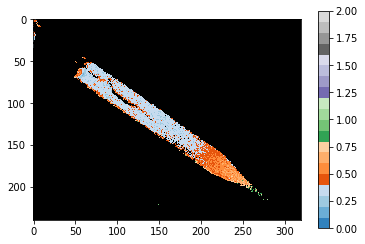

98
ratio = 0.4043195731450711


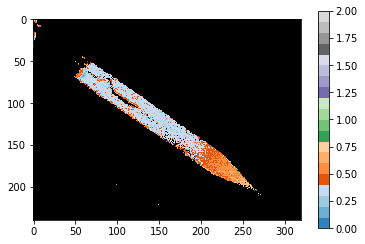

99
ratio = 0.40488146156350435


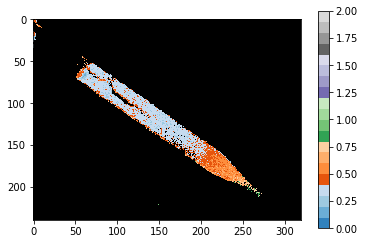

100
ratio = 0.40256688715372924


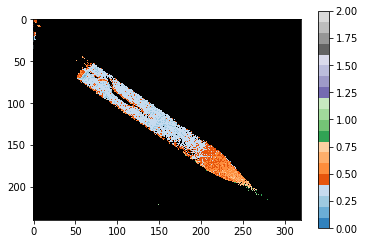

101
ratio = 0.40005941788514143


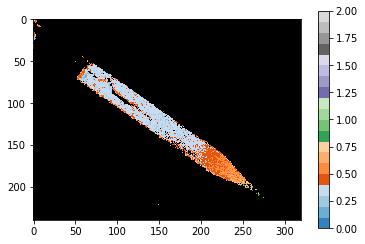

102
ratio = 0.3975676812710614


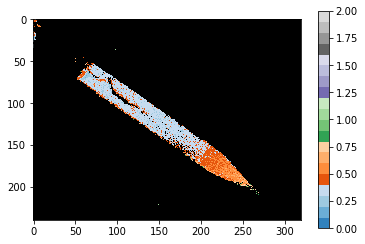

103
ratio = 0.39532952287639944


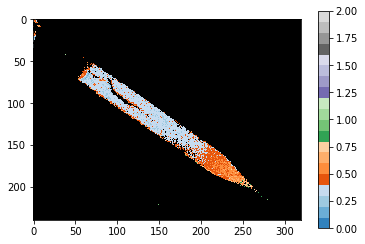

104
ratio = 0.39516358081296304


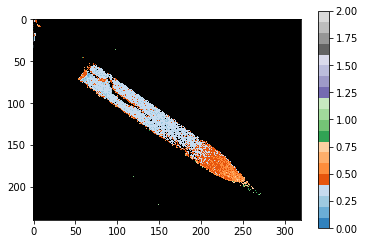

105
ratio = 0.3942875914220141


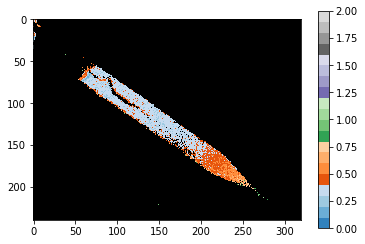

106
ratio = 0.39236400899516144


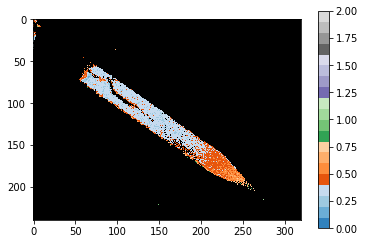

107
ratio = 0.38922669746463806


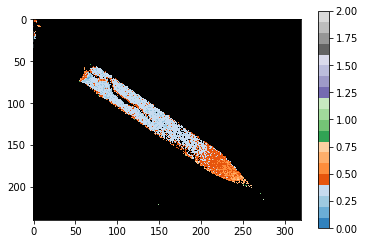

108
ratio = 0.38868370869846


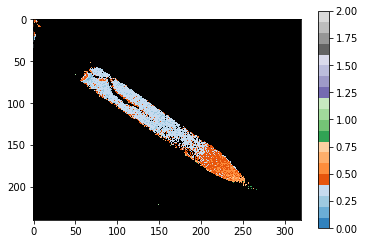

109
ratio = 0.3884640189040361


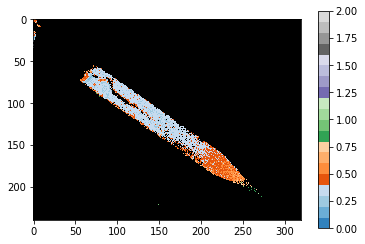

110
ratio = 0.3870283752649645


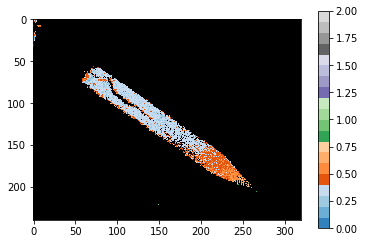

111
ratio = 0.38527934034122974


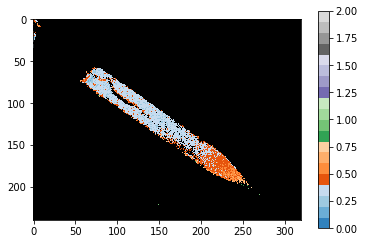

112
ratio = 0.38474509921890265


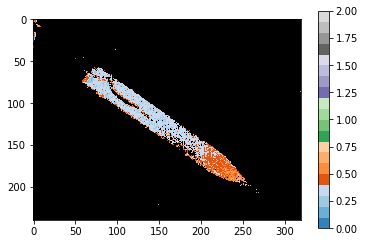

113
ratio = 0.3839046475308524


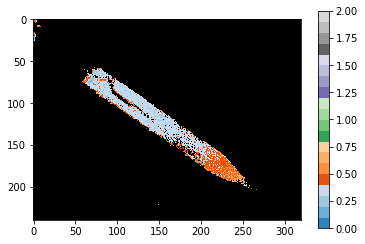

114
ratio = 0.3825312148708923


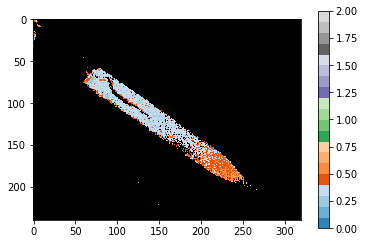

115
ratio = 0.38387210205465605


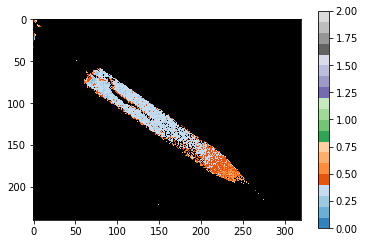

116
ratio = 0.3816641509143336


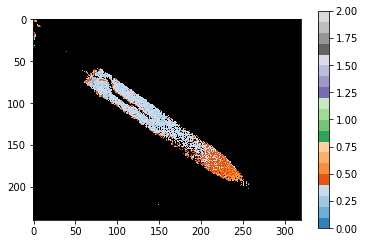

117
ratio = 0.38090549228905385


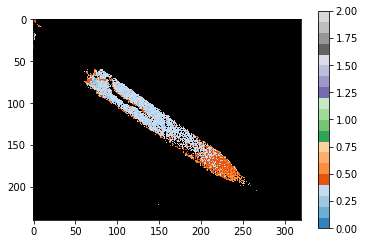

118
ratio = 0.38103395917957433


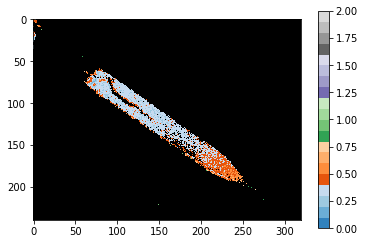

119
ratio = 0.37832635238500506


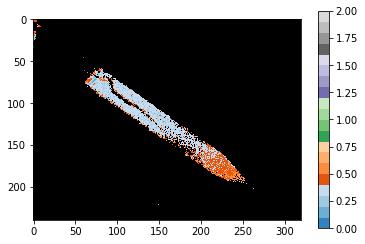

120
ratio = 0.37852416537920924


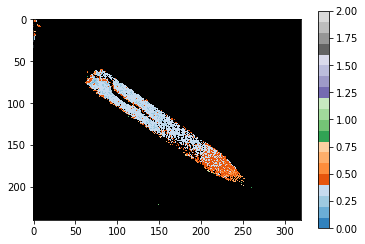

121
ratio = 0.37943711695758525


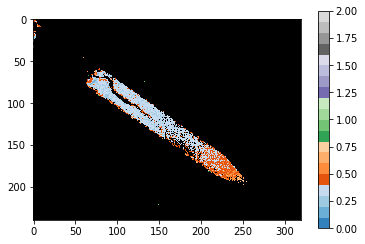

122
ratio = 0.37649950598148396


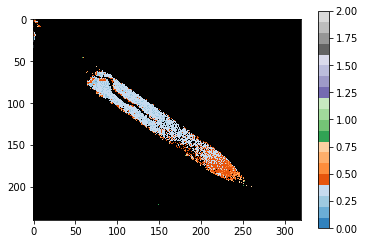

123
ratio = 0.3761769379413787


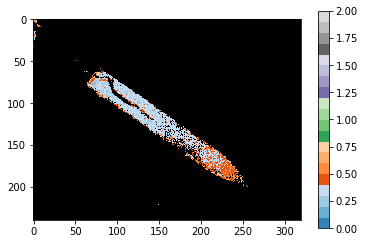

124
ratio = 0.3769729883928335


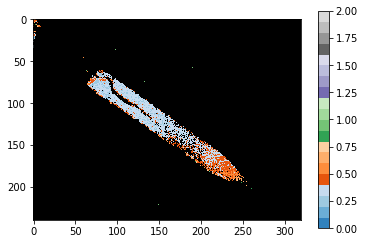

125
ratio = 0.37868357669180575


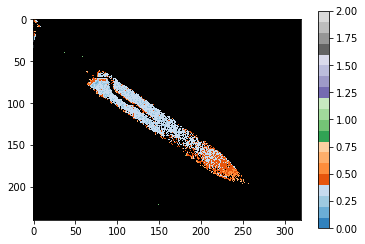

126
ratio = 0.376158847262317


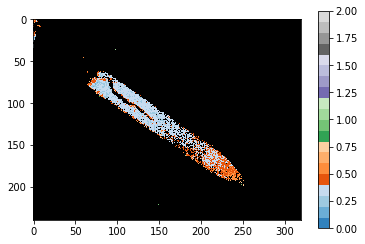

127
ratio = 0.3780454134474991


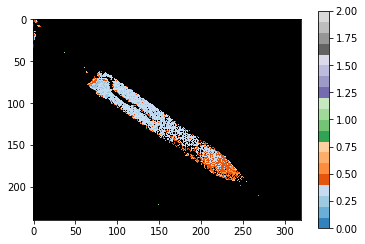

128
ratio = 0.37522131169823497


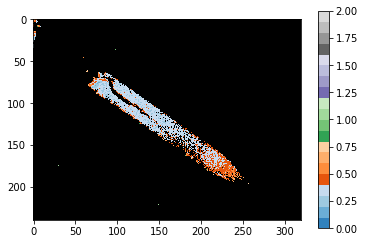

129
ratio = 0.37486604629352765


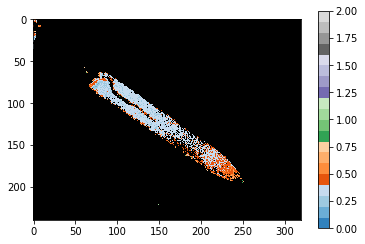

130
ratio = 0.3758142085123507


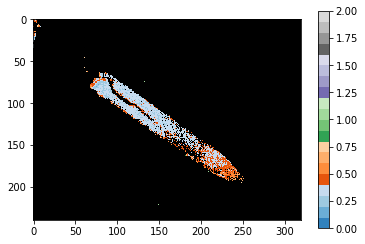

131
ratio = 0.37662215701158963


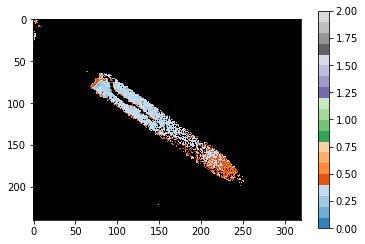

132
ratio = 0.3767868892958846


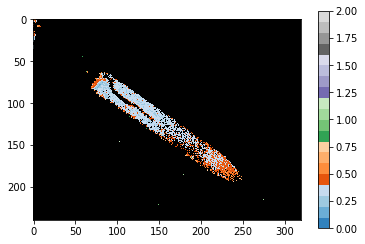

133
ratio = 0.37498166643598435


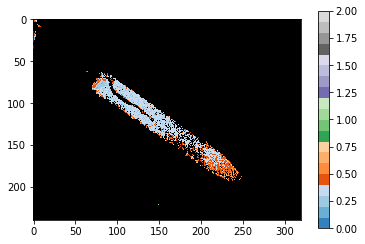

134
ratio = 0.3761917522330465


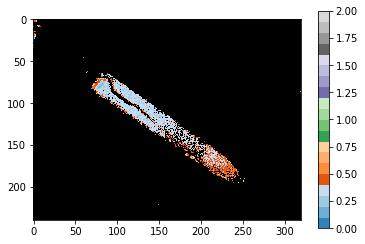

135
ratio = 0.3752131724867739


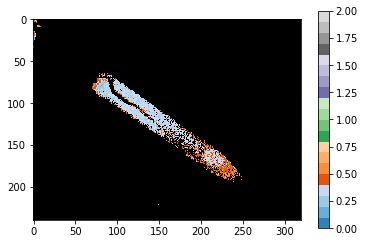

136
ratio = 0.37433726884298474


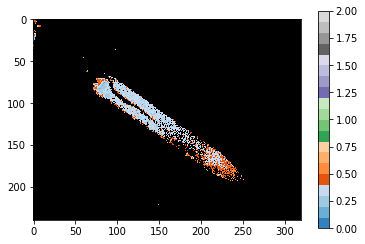

137
ratio = 0.3753205817929784


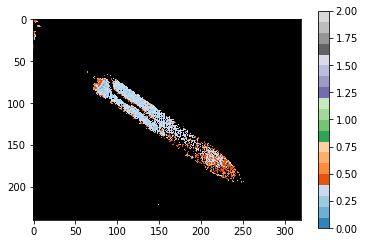

138
ratio = 0.3771576112107825


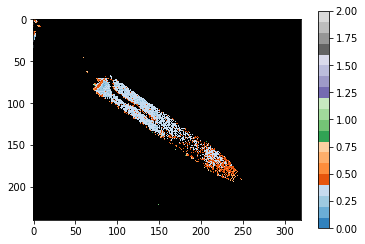

139
ratio = 0.37532703776831605


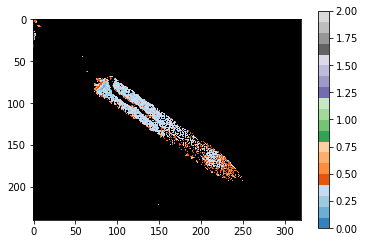

140
ratio = 0.37696358267758456


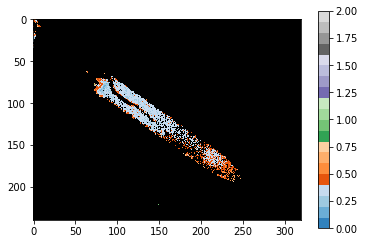

141
ratio = 0.37879445814887575


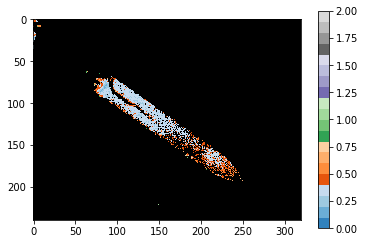

142
ratio = 0.3740603096487778


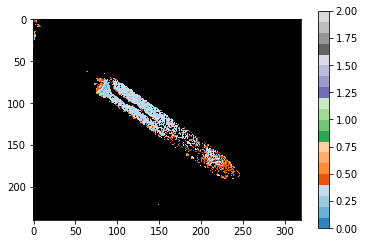

143
ratio = 0.3767908509840979


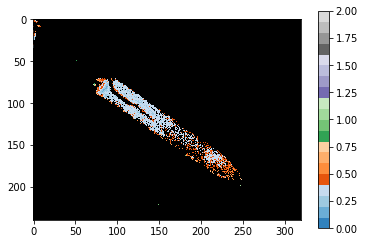

144
ratio = 0.3772313959046123


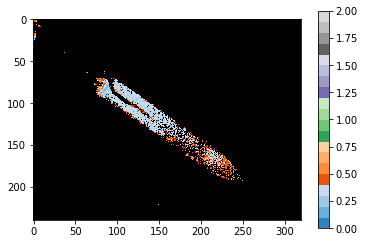

145
ratio = 0.37786347419345856


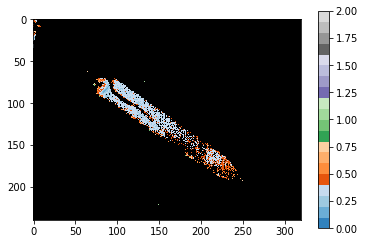

146
ratio = 0.37905916916584237


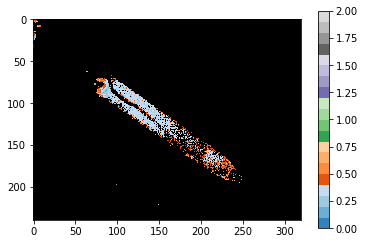

147
ratio = 0.3788257302566875


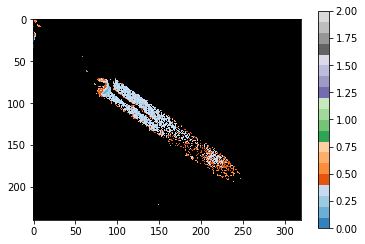

148
ratio = 0.38088753540299825


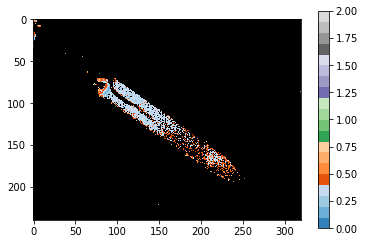

149
ratio = 0.37999273456801197


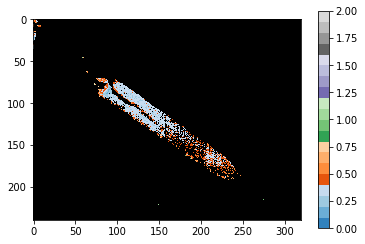

150
ratio = 0.37820545215275697


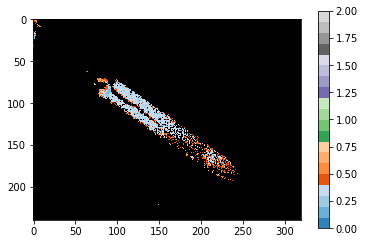

151
ratio = 0.38310239259123735


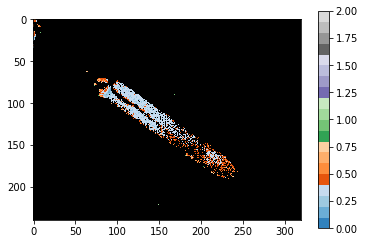

152
ratio = 0.3809408206858506


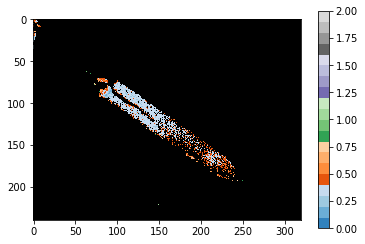

153
ratio = 0.3819336900007812


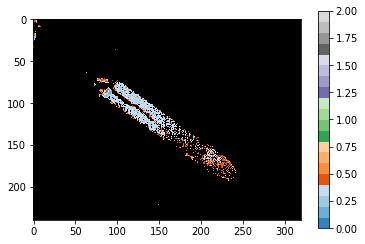

154
ratio = 0.381076634107249


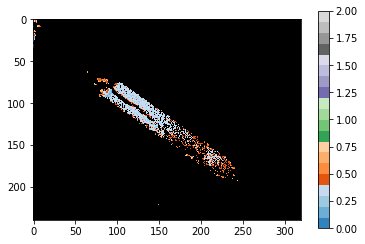

155
ratio = 0.3822294102544504


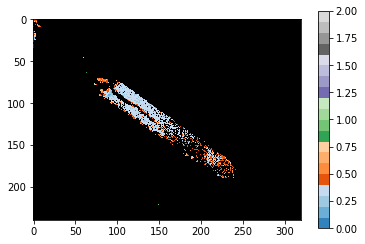

156
ratio = 0.3832917393347079


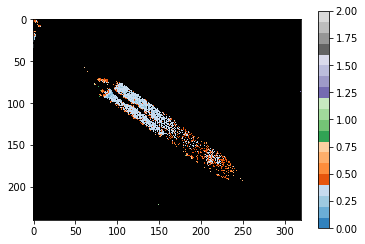

157
ratio = 0.3814397178801416


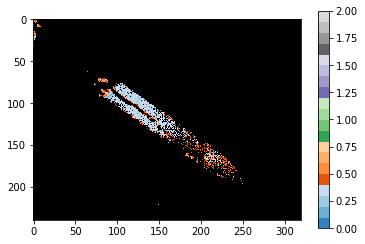

158
ratio = 0.3833913081746641


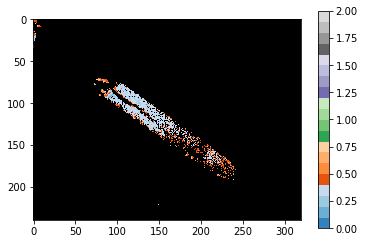

159
ratio = 0.38341127997306174


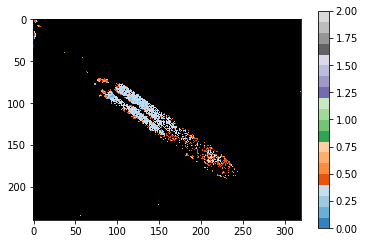

In [8]:
downsample = 4
max_ratio = 2
threshold = 16*4**downsample-2500
ratios = open('exp_ratio_data.txt', 'w')
ratios.write("i \t ratio \n")
# Import images and downsample
n = len(added_A)
for i in range(n):
    print(i)
    im1 = block_reduce(added_A[i], downsample)
    im2 = block_reduce(added_B[i], downsample)
   
    mim1 = ma.masked_less(im1,threshold)
    mim2 = ma.masked_less(im2,threshold)
    
    combined_mask = np.logical_or(ma.getmask(mim1),ma.getmask(mim2))
    mim1[combined_mask] = ma.masked
    mim2[combined_mask] = ma.masked
    
    mim_ratio = mim2/mim1
    print('ratio =', np.average(mim_ratio))
    ratios.write("{0} \t {1} \n".format(i, np.average(mim_ratio)))
    # Plot the data using a color map with discrete color transitions.
    palette = copy.copy(plt.cm.tab20c)
    palette.set_over('w', 1.0)
    palette.set_under('r', 1.0)
    palette.set_bad('k', 1.0)
    imgplot = plt.imshow(mim_ratio,
                     vmax=max_ratio,vmin=0,
                     cmap=palette)
    plt.colorbar()
    plt.savefig('{}'.format(i)+'.pdf', format = 'pdf')
    plt.show()
ratios.close()